In [0]:
!pip install openpyxl

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%restart_python

transaction_id,customer_id,age,gender,location,product_id,category,price,quantity,purchase_date,device,session_duration_min,promo_used,rating,completed,total_spent,implied_rating
TXN_000001,CUST_01456,22,F,Mumbai,PROD_0892,Home Decor,1902.83,2,2024-03-05T00:00:00.000Z,desktop,16.4,1,2,0,3805.66,2
TXN_000002,CUST_01640,27,F,Pune,PROD_0684,Beauty,3683.56,1,2023-11-01T00:00:00.000Z,mobile,27.1,0,4,1,3683.56,4
TXN_000003,CUST_00992,28,F,Pune,PROD_0965,Beauty,793.28,3,2024-09-22T00:00:00.000Z,desktop,4.3,0,5,0,2379.84,5
TXN_000004,CUST_04361,37,F,Chennai,PROD_0919,Home Decor,670.91,3,2023-01-02T00:00:00.000Z,desktop,22.4,1,1,1,2012.73,2
TXN_000005,CUST_03664,31,M,Kolkata,PROD_0452,Grocery,2501.22,1,2024-10-14T00:00:00.000Z,mobile,4.2,1,5,0,2501.22,5


/home/spark-5b02f2a0-bdb7-455d-9be5-1a/.ipykernel/4407/command-4778817119467324-209055078:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


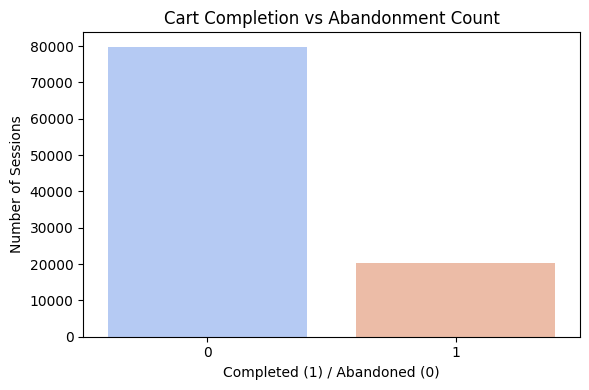

Model Accuracy: 0.798

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     19948
           1       0.00      0.00      0.00      5052

    accuracy                           0.80     25000
   macro avg       0.40      0.50      0.44     25000
weighted avg       0.64      0.80      0.71     25000



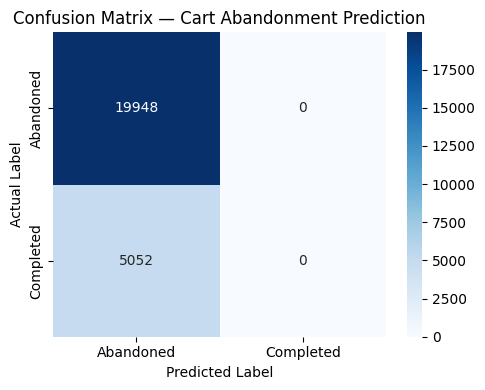

/home/spark-5b02f2a0-bdb7-455d-9be5-1a/.ipykernel/4407/command-4778817119467324-209055078:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_sorted, x="Coefficient", y="Feature", palette="viridis")


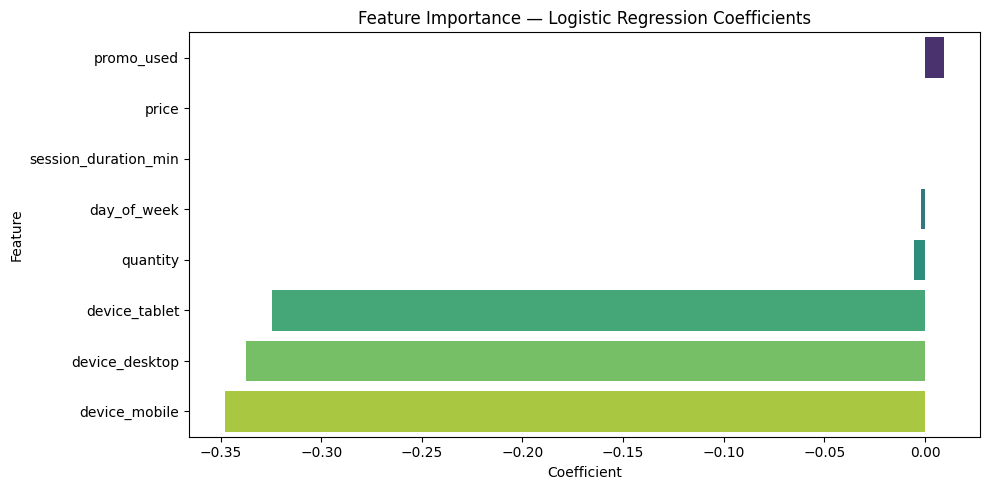

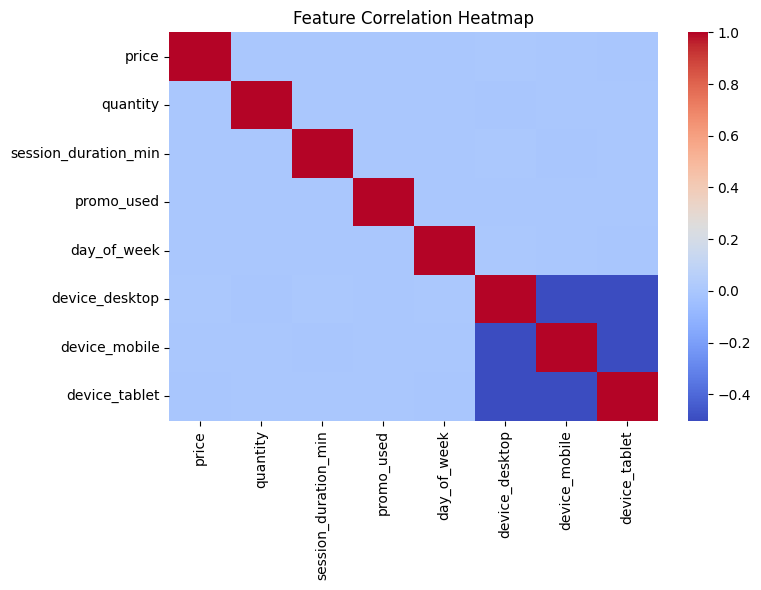

In [0]:
#  Use Case 5:Cart Abandonment Prediction using Logistic Regression
# ---------------------------------------------------------------------
# This notebook predicts whether a user session will complete a purchase or abandon the cart
# and visualizes model insights and patterns.
# ---------------------------------------------------------------------

# ---------------------------------------------------------------------
# 📦 Import Required Libraries
# ---------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import os

# ---------------------------------------------------------------------
# 📁 Load Dataset (update path if needed)
# ---------------------------------------------------------------------

df = pd.read_excel("/Volumes/capston_project-priya_saini(24mbmb34)/default/capston_project-priya_saini(24mbmb34)/ecommerce_data.xlsx", parse_dates=["purchase_date"])
display(df.head())

# ---------------------------------------------------------------------
# 🧮 Feature Engineering
# ---------------------------------------------------------------------
tx = df.copy()
tx["day_of_week"] = tx["purchase_date"].dt.dayofweek  # Monday=0 ... Sunday=6

# One-hot encode 'device' column
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
device_ohe = ohe.fit_transform(tx[["device"]])
device_cols = [f"device_{c}" for c in ohe.categories_[0]]
device_df = pd.DataFrame(device_ohe, columns=device_cols, index=tx.index)

# Combine numerical + encoded categorical features
tx_features = pd.concat(
    [
        tx[["price", "quantity", "session_duration_min", "promo_used", "day_of_week"]].reset_index(drop=True),
        device_df.reset_index(drop=True)
    ],
    axis=1
)

# Define features and target variable
X = tx_features.fillna(0)
y = tx["completed"]  # Target: 1 = Completed, 0 = Abandoned

# ---------------------------------------------------------------------
# 📊 EDA Visualization 1 — Target Distribution
# ---------------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Cart Completion vs Abandonment Count")
plt.xlabel("Completed (1) / Abandoned (0)")
plt.ylabel("Number of Sessions")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# ✂️ Train/Test Split
# ---------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# ---------------------------------------------------------------------
# 🧠 Model Training — Logistic Regression
# ---------------------------------------------------------------------
clf = LogisticRegression(max_iter=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ---------------------------------------------------------------------
# 📈 Model Evaluation
# ---------------------------------------------------------------------
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# ---------------------------------------------------------------------
# 📉 Visualization 2 — Confusion Matrix
# ---------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap="Blues",
    xticklabels=["Abandoned","Completed"], yticklabels=["Abandoned","Completed"]
)
plt.title("Confusion Matrix — Cart Abandonment Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 📊 Visualization 3 — Feature Importance
# ---------------------------------------------------------------------
coef = pd.DataFrame({"Feature": X.columns, "Coefficient": clf.coef_.flatten()})
coef_sorted = coef.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=coef_sorted, x="Coefficient", y="Feature", palette="viridis")
plt.title("Feature Importance — Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 🔍 Visualization 4 — Correlation Heatmap
# ---------------------------------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


